In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_auc_score,accuracy_score

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)


In [2]:
import warnings 
warnings.filterwarnings('ignore')

In [3]:
walmart = pd.read_csv('Walmart.csv')

In [4]:
walmart.head(100)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
5,1,12-03-2010,1439541.59,0,57.79,2.667,211.380643,8.106
6,1,19-03-2010,1472515.79,0,54.58,2.720,211.215635,8.106
7,1,26-03-2010,1404429.92,0,51.45,2.732,211.018042,8.106
8,1,02-04-2010,1594968.28,0,62.27,2.719,210.820450,7.808
9,1,09-04-2010,1545418.53,0,65.86,2.770,210.622857,7.808


In [5]:
walmart.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [6]:
walmart.shape

(6435, 8)

In [7]:
walmart.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


* We have 6435 rows and 8 columns
* No null values in the dataset


In [8]:
walmart.dtypes

Store             int64
Date             object
Weekly_Sales    float64
Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
dtype: object

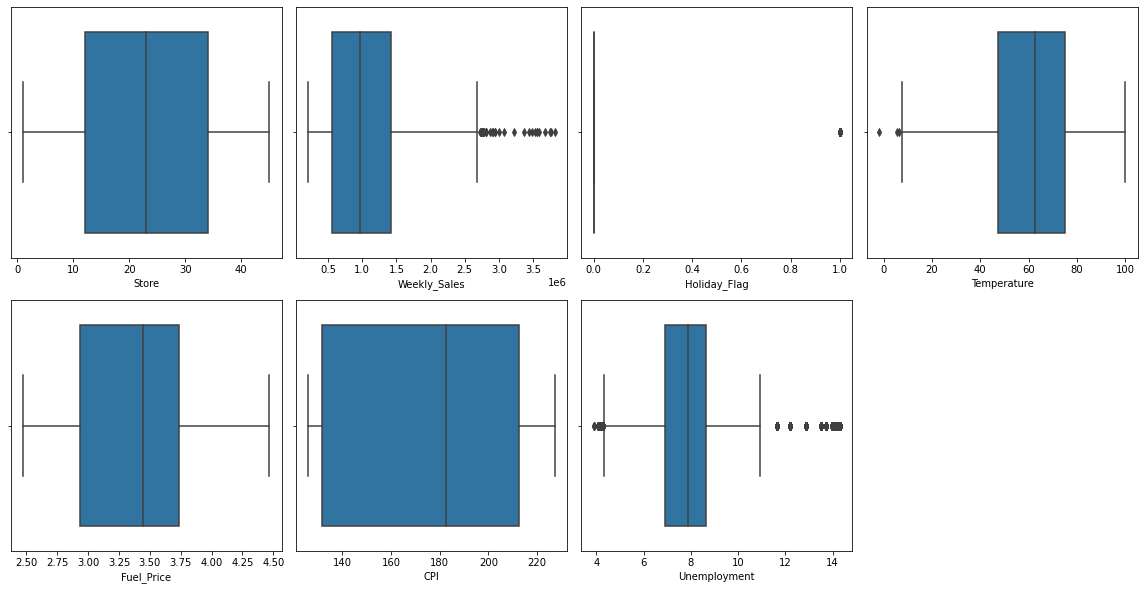

In [9]:
plt.figure(figsize=(16,16))
for i, col in enumerate(['Store', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment']):
    plt.subplot(4,4,i+1)
    sns.boxplot(walmart[col])
    plt.tight_layout()

* We need to consider holiday flag as categorial
* I think there might be few outliers in temperature columns, lets check in analysis, if required we shall remove it

In [10]:
walmart['Store'].nunique()

45

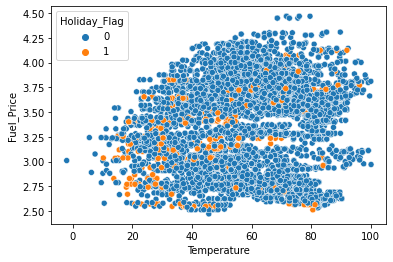

In [11]:
sns.scatterplot(data=walmart, x = 'Temperature', y ='Fuel_Price',hue='Holiday_Flag')

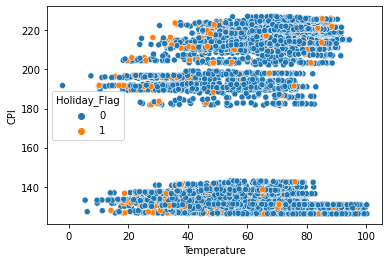

In [12]:
sns.scatterplot(data=walmart, x = 'Temperature', y ='CPI',hue='Holiday_Flag')

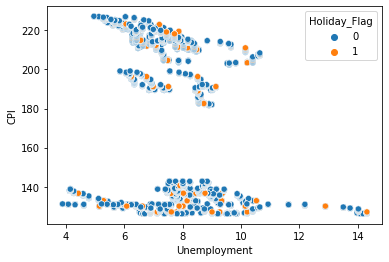

In [13]:
sns.scatterplot(data=walmart, y = 'CPI', x ='Unemployment',hue='Holiday_Flag')

* From first graph we observe that when temperature is low during winter
* We have data of 45 stores
* No specific insights from other graphs

In [14]:
walmart['Month_year'] = walmart['Date'].str[3:]

In [15]:
walmart.sort_values(by=['Date'],ascending=False,inplace=True)

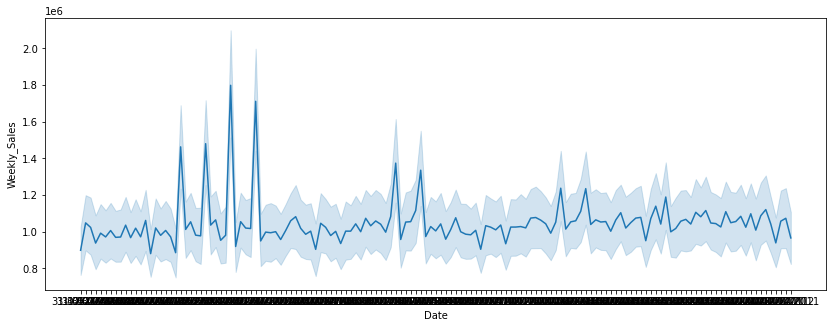

In [16]:
plt.figure(figsize=(14,5))
sns.lineplot(data = walmart, y = 'Weekly_Sales', x = 'Date')

* Data is not clearly visible in above graph, Lets analyse store wise

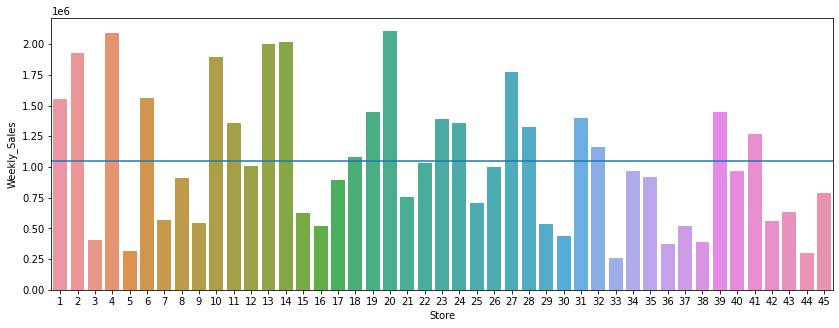

In [17]:
df = walmart.groupby(['Store']).agg({'Weekly_Sales':'mean'}).reset_index()
plt.figure(figsize=(14,5))
graph = sns.barplot(data = df, x = 'Store', y = 'Weekly_Sales')
graph.axhline(df['Weekly_Sales'].mean())

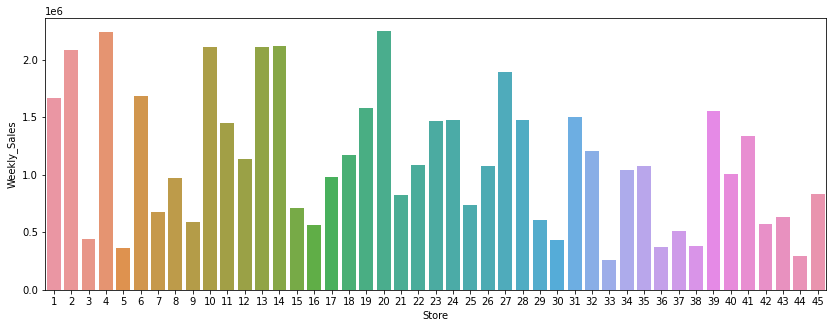

In [18]:
df = walmart[walmart['Holiday_Flag']==1].groupby(['Store']).agg({'Weekly_Sales':'mean'}).reset_index()
plt.figure(figsize=(14,5))
sns.barplot(data = df, x = 'Store', y = 'Weekly_Sales')

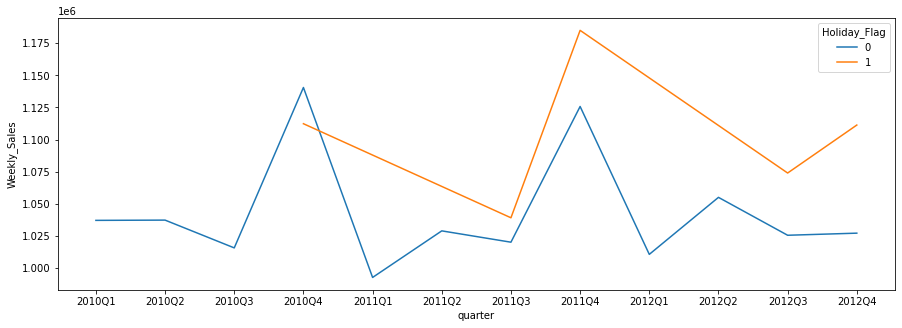

In [19]:
walmart['quarter'] = pd.PeriodIndex(walmart['Date'] ,freq='Q')
walmart['quarter'] = walmart['quarter'].astype(str)
df = walmart.groupby(['quarter','Holiday_Flag']).agg({'Weekly_Sales':'mean'}).reset_index()
plt.figure(figsize=(15,5))
graph = sns.lineplot(data = df, x = 'quarter', y = 'Weekly_Sales', hue = 'Holiday_Flag')

* Only 19 stores of 45 have crossed avg sales
* No significant change in pattern in sales during holidays
* Sales in end of year is significant campared to rest of year
* Only few weeks has holiday sales, mainly in year end, however the average sales during holiday are way more than usual sales

In [20]:
walmart.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment', 'Month_year', 'quarter'],
      dtype='object')

StoreWise Analysis

In [21]:
df = walmart.groupby(['Store','quarter']).agg({'Weekly_Sales':'mean'}).reset_index()

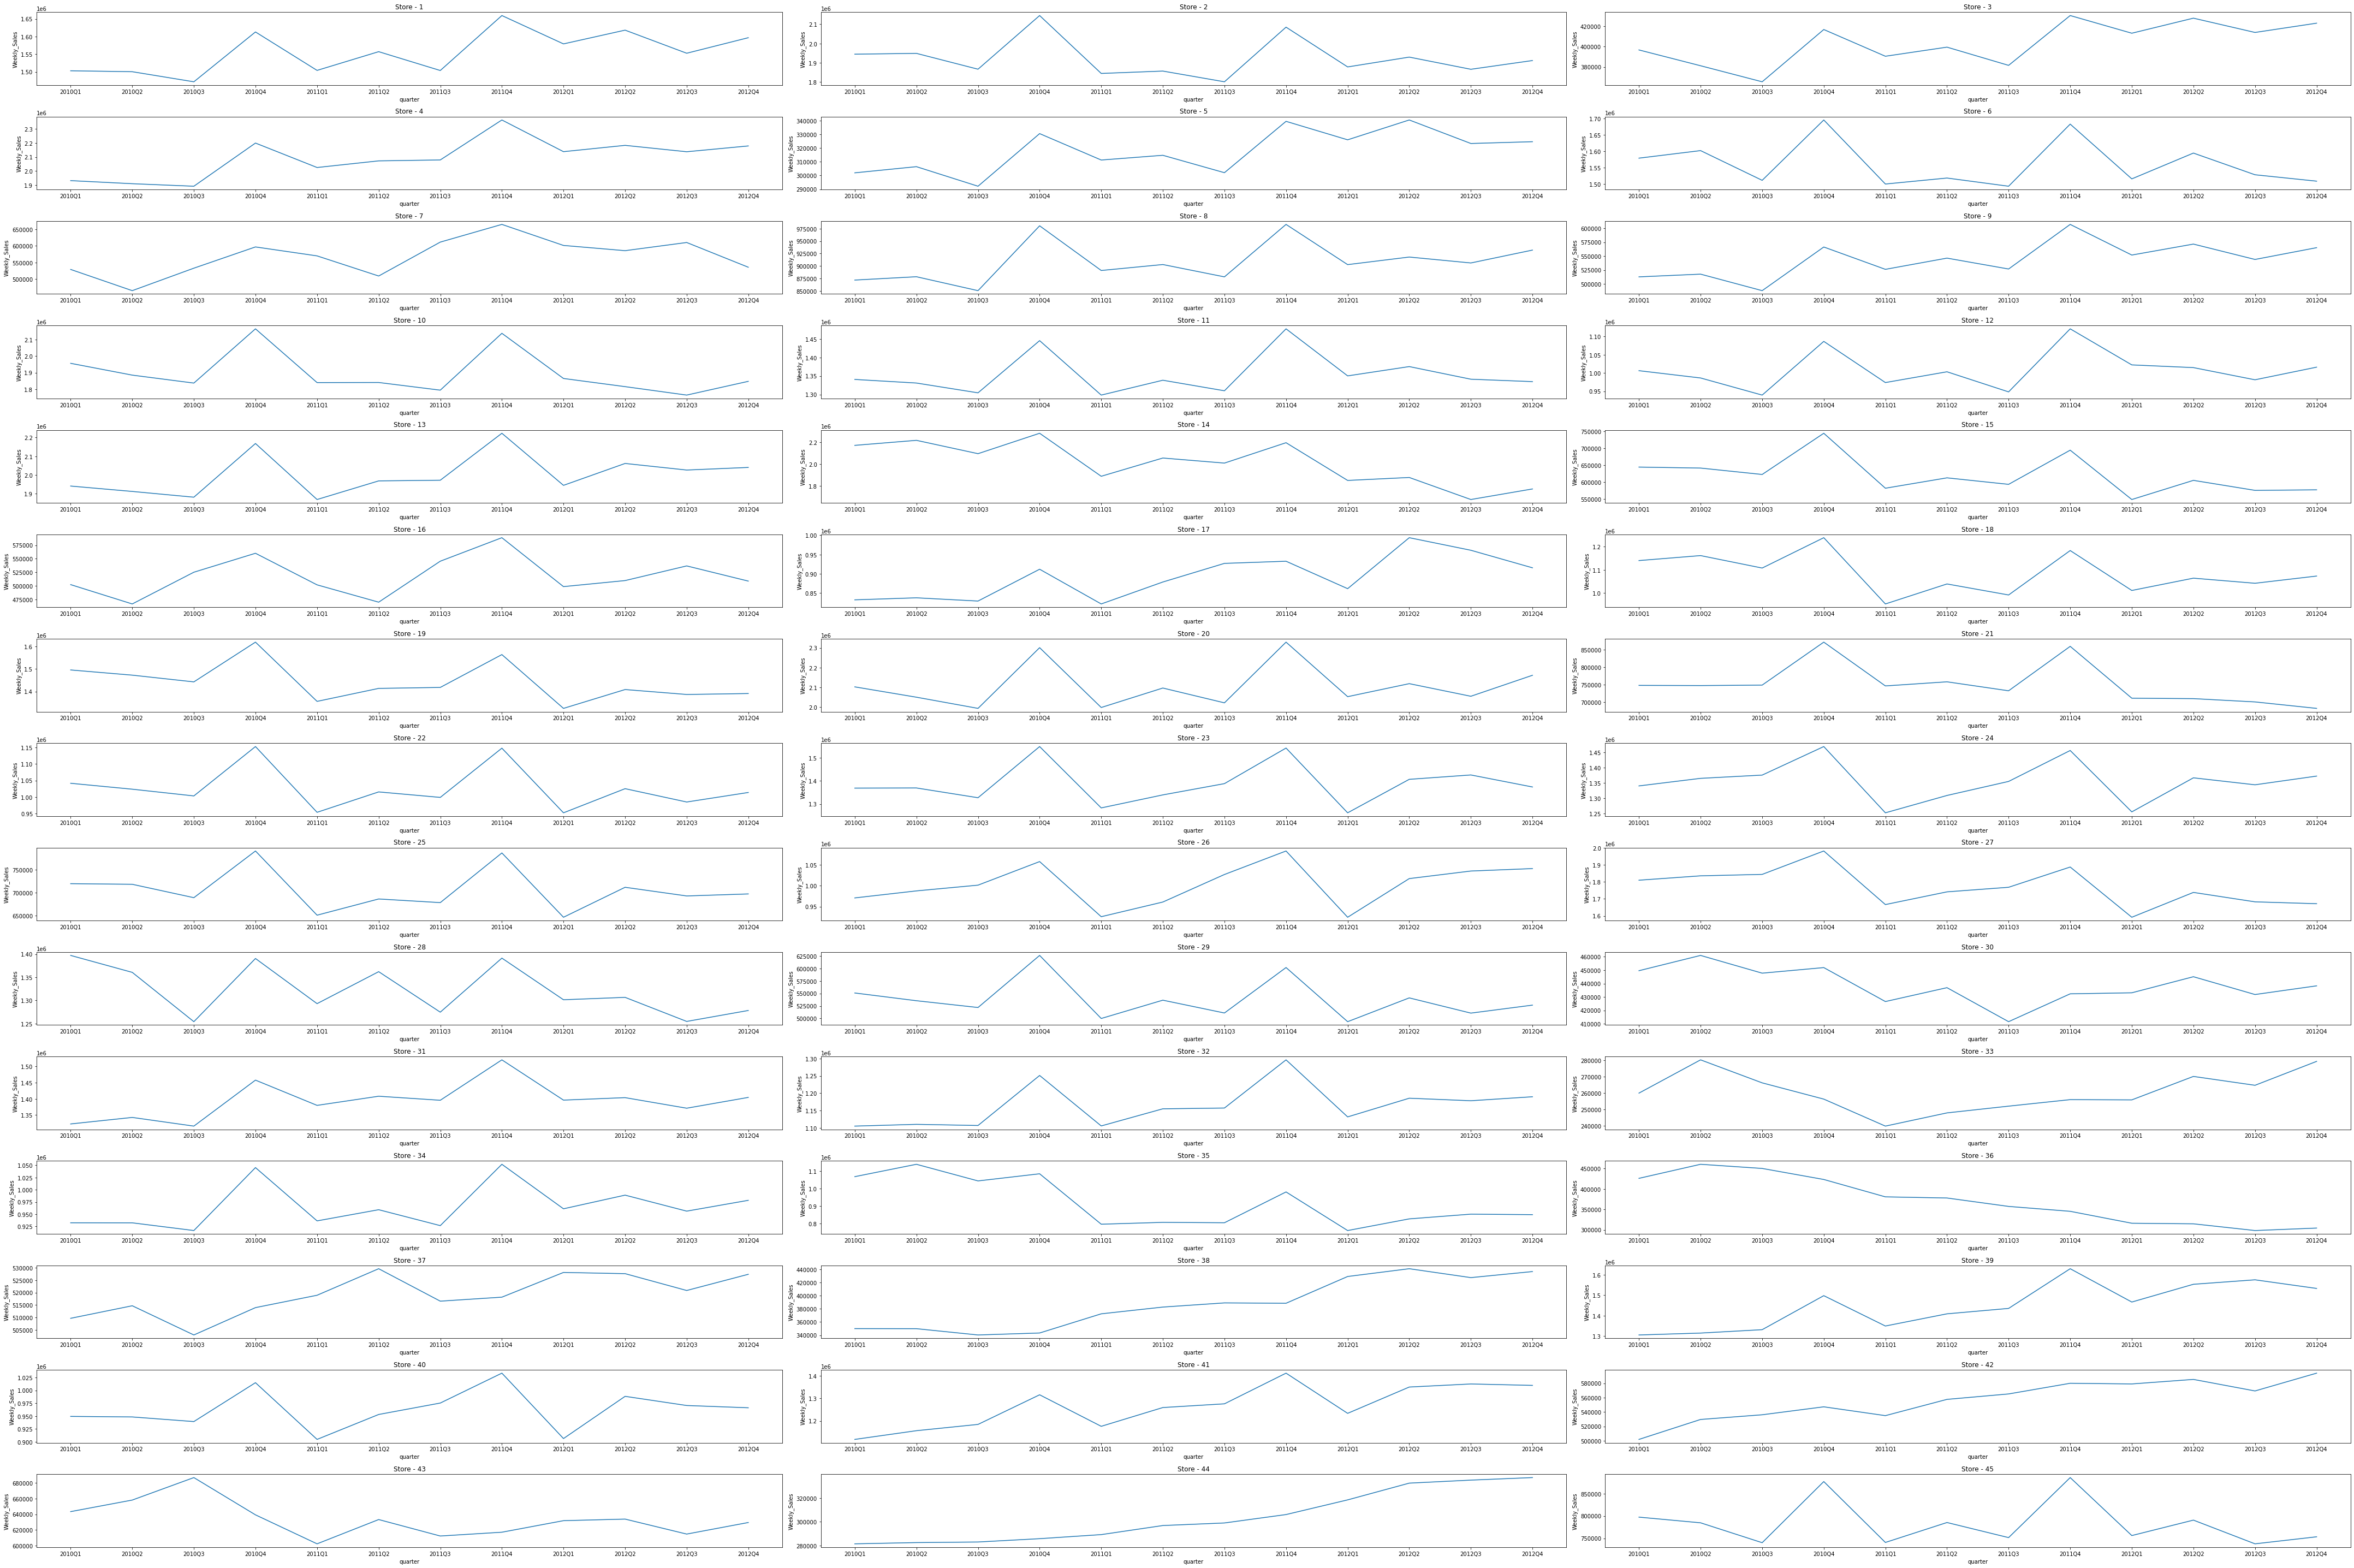

In [22]:
plt.figure(figsize=(60,40))
for i, col in enumerate(df['Store'].unique()):
    plt.subplot(15,3,i+1)
    sns.lineplot(data = df[df['Store']==col],x = 'quarter', y ='Weekly_Sales')
    plt.title('Store - '+str(col))
    plt.tight_layout()

* Most of the stores have similar pattern of increasring sales in Q4 except few.
* Only two stores has overall decreasing trend that is store 36 and store 14.
* Four stores 3, 38, 44 and 42 have increasing trend from the begining.

Lets try to find the reason behind increasing and decreasing trend.

In [23]:
print('Avg consumer price index across all stores - '+str(walmart['CPI'].mean()))
print('Avg Unemployment across all stores - '+str(walmart['Unemployment'].mean()))
print('Avg Fuel_Price across all stores - '+str(walmart['Fuel_Price'].mean()))
print('Avg Temperature across all stores - '+str(walmart['Temperature'].mean()))

Avg consumer price index across all stores - 171.57839384878014
Avg Unemployment across all stores - 7.999151048951048
Avg Fuel_Price across all stores - 3.358606837606838
Avg Temperature across all stores - 60.66378243978244


In [24]:
print('Avg consumer price index across all stores -' + str(walmart[walmart['Store'].isin([36,14])]['CPI'].mean()))
print('Avg Unemployment across all stores - '+str(walmart[walmart['Store'].isin([36,14])]['Unemployment'].mean()))
print('Avg Fuel_Price across all stores - '+str(walmart[walmart['Fuel_Price'].isin([36,14])]['Fuel_Price'].mean()))
print('Avg Temperature across all stores - '+str(walmart[walmart['Temperature'].isin([36,14])]['Temperature'].mean()))

Avg consumer price index across all stores -200.5073736583916
Avg Unemployment across all stores - 8.2588986013986
Avg Fuel_Price across all stores - nan
Avg Temperature across all stores - 36.0


In [25]:
print('Avg consumer price index across all stores - ' + str(walmart[walmart['Store'].isin([3,38,44,42])]['CPI'].mean()))
print('Avg Unemployment across all stores - '+str(walmart[walmart['Store'].isin([3,38,44,42])]['Unemployment'].mean()))
print('Avg Fuel_Price across all stores - '+str(walmart[walmart['Fuel_Price'].isin([3,38,44,42])]['Fuel_Price'].mean()))
print('Avg Temperature across all stores - '+str(walmart[walmart['Temperature'].isin([3,38,44,42])]['Temperature'].mean()))

Avg consumer price index across all stores - 151.35763491153844
Avg Unemployment across all stores - 8.848013986013987
Avg Fuel_Price across all stores - 3.0
Avg Temperature across all stores - 42.0


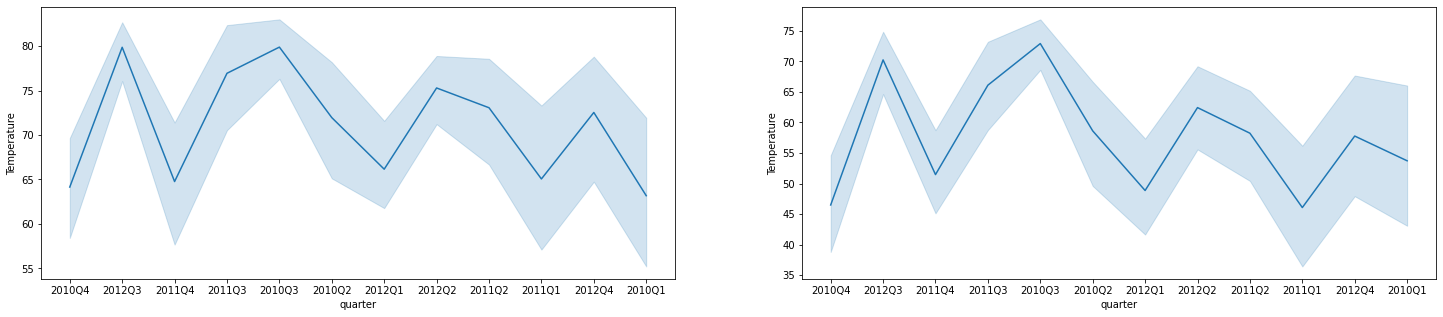

In [26]:
fig, ax =plt.subplots(1,2,figsize=(25,5))
sns.lineplot(data = walmart[walmart['Store']==36],x = 'quarter', y ='Temperature', ax=ax[0])
sns.lineplot(data = walmart[walmart['Store']==14],x = 'quarter', y ='Temperature', ax=ax[1])

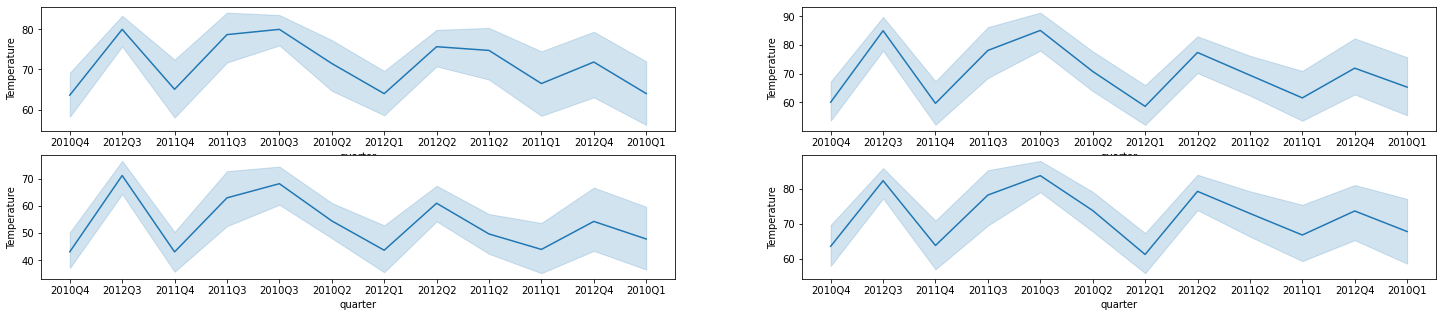

In [27]:
fig, ax =plt.subplots(2,2,figsize=(25,5))
sns.lineplot(data = walmart[walmart['Store']==3],x = 'quarter',  y ='Temperature', ax=ax[0][0])
sns.lineplot(data = walmart[walmart['Store']==38],x = 'quarter', y ='Temperature', ax=ax[0][1])
sns.lineplot(data = walmart[walmart['Store']==44],x = 'quarter', y ='Temperature', ax=ax[1][0])
sns.lineplot(data = walmart[walmart['Store']==42],x = 'quarter', y ='Temperature', ax=ax[1][1])

* Consumer price index for store 36 and 14 is way too high compare to averge across all stores
* Tired plotting trending for all feaures, but no specific trend for insights 

Lets try to analyse the data of top and bottom performing stores

In [28]:
df = walmart.groupby(['Store']).agg({'Weekly_Sales':'mean'}).reset_index().sort_values(by=['Weekly_Sales'])

In [29]:
print('Stores with highest averge sales - ' + str(df['Store'].head(3).values))

Stores with highest averge sales - [33 44  5]


In [30]:
print('Stores with highest averge sales - ' + str(df['Store'].tail(3).values))

Stores with highest averge sales - [14  4 20]


Now lets predict the sales values

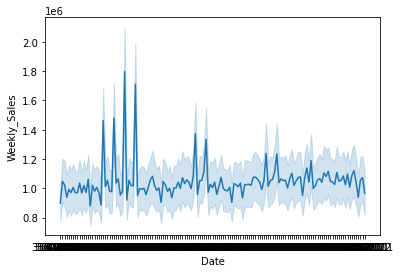

In [31]:
sns.lineplot(data = walmart, y = 'Weekly_Sales', x = 'Date')

In [32]:
walmart.reset_index(drop=True,inplace=True)

Lets check how will the rolling mean of 4 performs

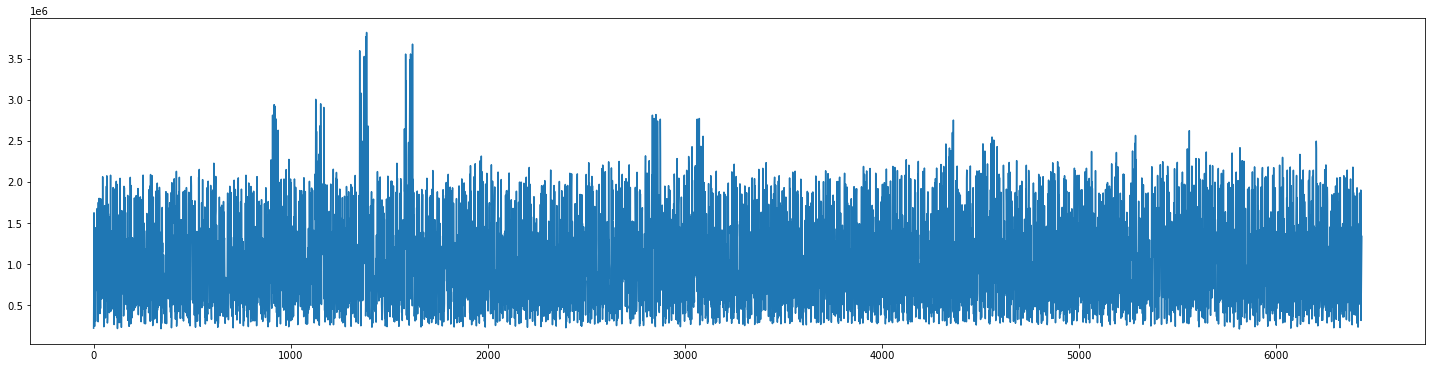

In [33]:
rolmean = walmart['Weekly_Sales'].rolling(window=12).mean()
rolvar = walmart['Weekly_Sales'].rolling(window=12).std()

plt.figure(figsize=(25,6))
plt.plot(walmart['Weekly_Sales'], label='Original')
# plt.plot(rolmean, label='Rolling Mean')
# plt.plot(rolvar, label='Rolling Standard Variance')
# plt.legend(loc='best')
# plt.title('Rolling Mean & Standard Deviation')
# plt.show(block=False)

Graph is not clears, lets plot recent 1000 days data

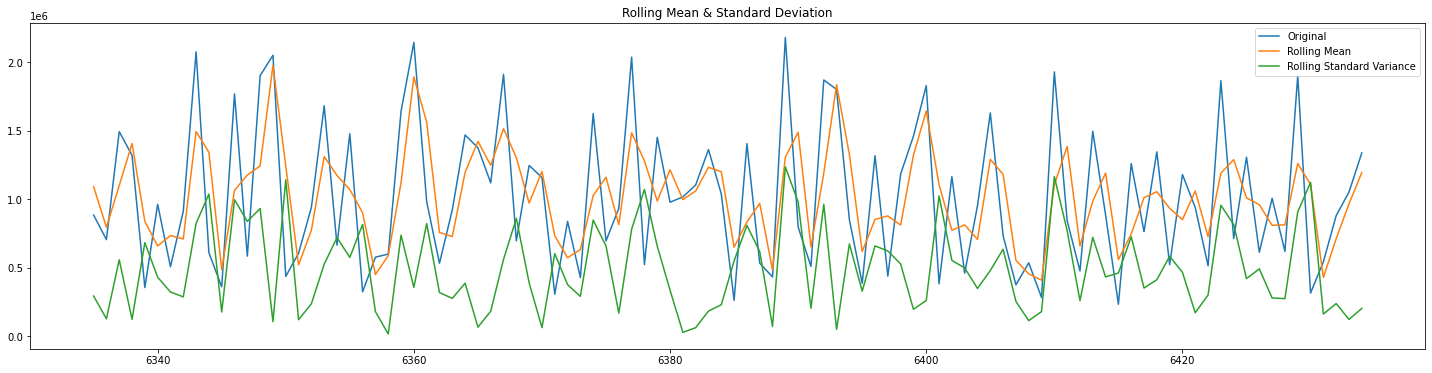

In [34]:
rolmean = walmart['Weekly_Sales'].rolling(window=2).mean()
rolvar = walmart['Weekly_Sales'].rolling(window=2).std()

plt.figure(figsize=(25,6))
plt.plot(walmart['Weekly_Sales'].tail(100), label='Original')
plt.plot(rolmean.tail(100), label='Rolling Mean')
plt.plot(rolvar.tail(100), label='Rolling Standard Variance')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

Hmmm, Rolling mean is able to capture the trend, lets check with other methods

In [35]:
from sklearn.metrics import mean_squared_error, r2_score
import math

def model_evaluation(y_pred, y_true):
    print('RMSE - ',math.sqrt(mean_squared_error(y_pred, y_true)))
    print('R2 Score - ',r2_score(y_pred, y_true))

In [36]:
rolmean = walmart['Weekly_Sales'].rolling(window=2).mean()
rolmean = rolmean.fillna(0)

In [37]:
model_evaluation(rolmean, walmart['Weekly_Sales'])

RMSE -  392961.82042097644
R2 Score -  0.05933470126710194


In [38]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(walmart['Weekly_Sales'].values,period=30)

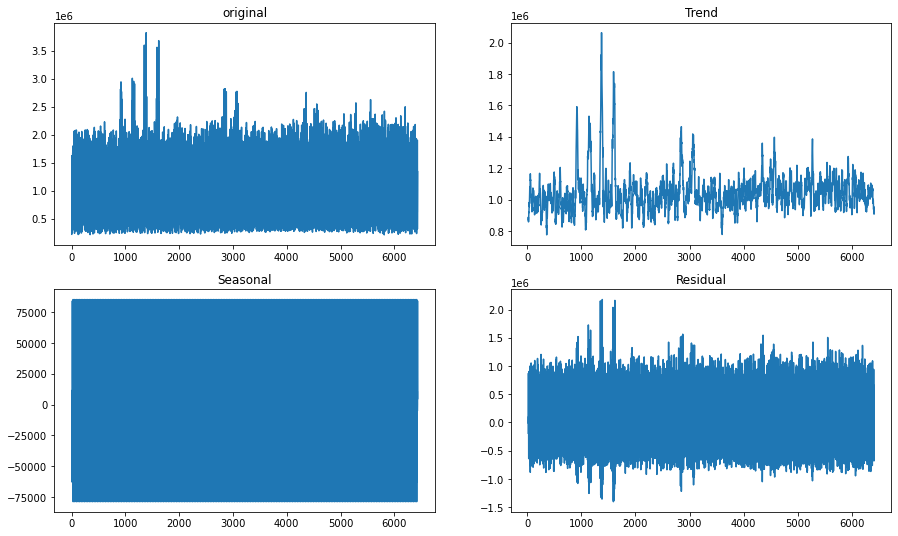

In [39]:
def plot_components(original, decomposition):
    trend = decomposition.trend
    seasonal = decomposition.seasonal
    residual = decomposition.resid 
    
    fig, ax =plt.subplots(2,2,figsize=(15,9))
    sns.lineplot(y=original.values, x=range(len(original)),ax=ax[0][0]).set(title= 'original')
    sns.lineplot(y=trend, x=range(len(trend)),ax=ax[0][1]).set(title= 'Trend')
    sns.lineplot(y=seasonal, x=range(len(original)),ax=ax[1][0]).set(title= 'Seasonal')
    sns.lineplot(y=residual, x=range(len(original)),ax=ax[1][1]).set(title= 'Residual')
    
    
plot_components(walmart['Weekly_Sales'], decomposition)   

Seasonal graph is too stacked, cannot observe anything. Lets decompose for past 100 days

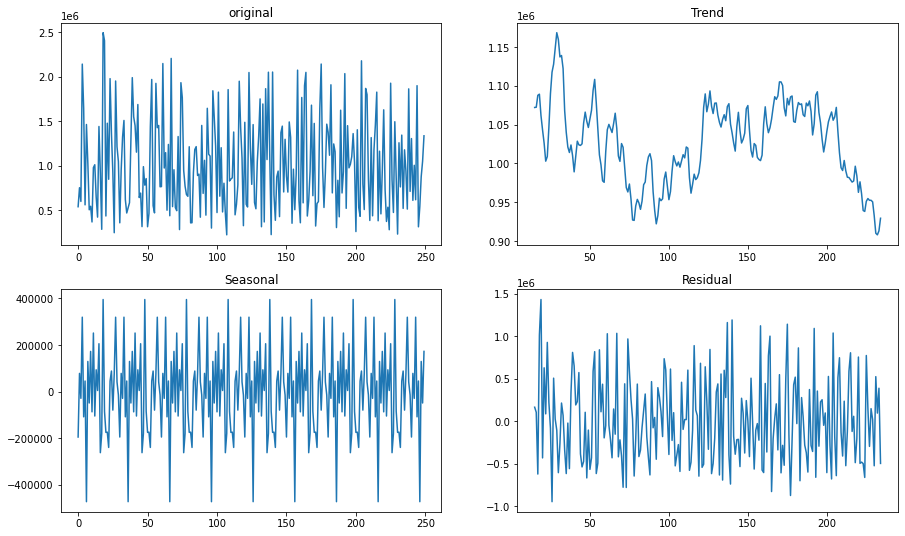

In [40]:
decomposition = seasonal_decompose(list(walmart['Weekly_Sales'].tail(250)),period=30)
plot_components(walmart['Weekly_Sales'].tail(250), decomposition)   

- Uniform seasonal variation in the sales for past 800 days
- We can use standard regression algorithm for predicting the future price

In [41]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
# from sm.tsa.statespace import SARIMAX

In [42]:
# Dickey Fuller test
def stationarity_test(timeseries):
    
    print('Results of Dickey Fuller Test ')  
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#lags Used', 'Number of Observations Used'])
    print(dfoutput)

In [43]:
stationarity_test(walmart['Weekly_Sales'])

Results of Dickey Fuller Test 
Test Statistic                  -20.903789
p-value                           0.000000
#lags Used                       10.000000
Number of Observations Used    6424.000000
dtype: float64


P-value is greater than the alpha value, we cannot reject the Hypothesis

In [44]:
close_price = np.log(walmart['Weekly_Sales'])

close_price = close_price.diff(periods=1)
close_price.dropna(inplace=True)

stationarity_test(close_price)

Results of Dickey Fuller Test 
Test Statistic                  -23.631555
p-value                           0.000000
#lags Used                       34.000000
Number of Observations Used    6399.000000
dtype: float64


P-value is very less than the alpha value, So we can conclude that close price is Stationary, hence we can use ARIMA, fbprofect etc

In [45]:
test = walmart.tail(100)
train = walmart.head(walmart.shape[0]-100)

In [46]:
# plt.figure(figsize=(14,6))
# sns.lineplot(y=test['Weekly_Sales'], x=test['Date'])
# sns.lineplot(y=train['Weekly_Sales'], x=train['Date']).set(title= 'Train and Test dataset')
# # plt.title('Rolling Mean & Standard Deviation')
# # plt.show(block=False)

In [47]:
# grid-search on (p,d,q) parameters, to find the best arima model
p_range = range(1,5)
d_range = range(1,3)
q_range = range(1,5)



def best_arima(train,p_range,d_range,q_range):
    best_aic = np.inf
    best_model = None
    best_order = None
    
    for (p,d,q) in list(zip(p_range,d_range,q_range)):
        arima = sm.tsa.statespace.SARIMAX(train.values, order=(p,d,q)).fit(trend='nc',disp=0)
        aic = arima.aic
        if aic < best_aic:
            best_model = arima
            best_order = (p,d,q)
            best_aic = aic
    return best_model,best_aic,best_order


In [48]:
arima,aic,order = best_arima(train['Weekly_Sales'],p_range,d_range,q_range)

In [49]:
print("Best AIC : ",aic)
print("Best Order : ",order)

Best AIC :  185878.70800091323
Best Order :  (1, 1, 1)


In [50]:
import statsmodels.api as sm
model=sm.tsa.statespace.SARIMAX(train['Weekly_Sales'],order=(1, 1, 1))
model_arima=model.fit()

In [51]:
test['Prediction'] = model_arima.predict(start=6335,end=6335+100,dynamic=True)

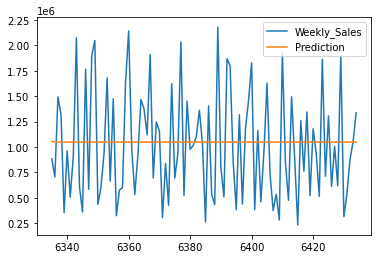

In [52]:
test[['Weekly_Sales', 'Prediction']].plot()

In [53]:
from sklearn.metrics import mean_squared_error, r2_score
import math

In [54]:
def model_evaluation(y_pred, y_true):
    print('RMSE - ',math.sqrt(mean_squared_error(y_pred, y_true)))
    print('R2 Score - ',r2_score(y_pred, y_true))

In [55]:
model_evaluation(test['Prediction'], test['Weekly_Sales'])

RMSE -  528422.0294236229
R2 Score -  -527411.2022989768


Model is performing is very bad on the test dataset, we have got very bad RMSE and R2 score, Let us try with LSTM model

RMSE and R2 score error is quite high, let us try with deep learning models

In [56]:
# !pip install tensorflow

In [57]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Bidirectional
from tensorflow.keras.metrics import MeanSquaredError
from sklearn.preprocessing import MinMaxScaler
import itertools

In [58]:
sc = MinMaxScaler(feature_range = (0, 1))

test = walmart.tail(100)
train = walmart.tail(walmart.shape[0]-100)

df_train = sc.fit_transform(train[['Weekly_Sales']])
df_test = sc.transform(test[['Weekly_Sales']])

# df_train = np.array(train[['Close']])
# df_test = np.array(test[['Close']])

In [59]:
def prepare_dataset(dataset, window = 60):
    X = []
    y = []
    for i in range(window, len(dataset)):
        X.append(np.reshape(dataset[i-window:i,0], (window, 1)))
        y.append(dataset[i])

    X = np.stack(X)
    y = np.stack(y)
    return X, y

In [60]:
x_train, y_train = prepare_dataset(df_train, window = 2)
x_test, y_test = prepare_dataset(df_test, window = 2)

In [61]:
x_test.shape

(98, 2, 1)

In [62]:
def build_lstm_Bidirectional ():
    # Build an LSTM model
    model = Sequential()
    model.add(Bidirectional(LSTM(246, return_sequences=True), input_shape= (2, 1)))
    model.add(Bidirectional(LSTM(128, return_sequences=False)))
    model.add(Dense(64))
    model.add(Dense(32))
    model.add(Dense(1))
    
    # Compile the model
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=[MeanSquaredError()])
    model.summary()
    
    return model
model = build_lstm_Bidirectional ()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional (Bidirectional (None, 2, 492)            488064    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 256)               635904    
_________________________________________________________________
dense (Dense)                (None, 64)                16448     
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 1,142,529
Trainable params: 1,142,529
Non-trainable params: 0
_________________________________________________________________


In [63]:
history = model.fit(x_train, y_train, epochs = 10, batch_size = 32, verbose=1)

Epoch 1/10
198/198 [==============================] - 9s 15ms/step - loss: 0.0258 - mean_squared_error: 0.0258
Epoch 2/10
198/198 [==============================] - 3s 16ms/step - loss: 0.0246 - mean_squared_error: 0.0246
Epoch 3/10
198/198 [==============================] - 4s 20ms/step - loss: 0.0248 - mean_squared_error: 0.0248
Epoch 4/10
198/198 [==============================] - 4s 18ms/step - loss: 0.0247 - mean_squared_error: 0.0247
Epoch 5/10
198/198 [==============================] - 4s 18ms/step - loss: 0.0246 - mean_squared_error: 0.0246
Epoch 6/10
198/198 [==============================] - 4s 18ms/step - loss: 0.0247 - mean_squared_error: 0.0247 0s - loss: 0.0247 - mean_squared_error: 0.
Epoch 7/10
198/198 [==============================] - 3s 16ms/step - loss: 0.0247 - mean_squared_error: 0.0247
Epoch 8/10
198/198 [==============================] - 3s 15ms/step - loss: 0.0247 - mean_squared_error: 0.0247
Epoch 9/10
198/198 [==============================] - 3s 16ms/step - 

In [64]:
y_pred = model.predict(x_test)

In [65]:
model_evaluation(y_pred, y_test)

RMSE -  0.14838081459351313
R2 Score -  -2339.3810242277586


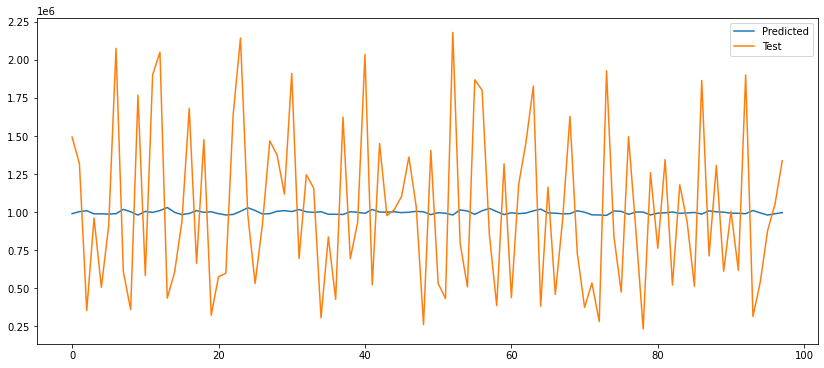

In [66]:
plt.figure(figsize=(14,6))
sns.lineplot(y=(sc.inverse_transform([list(itertools.chain(*y_pred))])).tolist()[0], x=range(len(y_pred)))
sns.lineplot(y=(sc.inverse_transform([list(itertools.chain(*y_test))])).tolist()[0], x=range(len(y_test)))
plt.legend(labels=['Predicted', 'Test'])
plt.show()

**Conclusion on EDA**
- Only few stores have sales more than average.
- Sales is relativly high when there is holiday compared to non holiday.
- Few stores have upword trend and few have downward trend, this might be due CPI.
- Most of the stores have similar pattern of sales, it looks like data is synthetic.
- From the dataset we observe that there is no promotion or discounts offered. Offers during holiday can increase the sales.

**Conclusion on predictions**
- Closing price is not stationary, hence we could try with ARIMA, It gave very bad results.
- Closing price is seasonal, from graph analysis.
- Rolling mean of 2 works better than ML/DL model, We can use it to predict sales for next 12 weeks 
- LSTM is model is not able to capture the trend, As said above data looks like synthetic, there is no specific pattern or trend in the dataset